<a href="https://colab.research.google.com/github/ManDes71/Rakuten_Text_Classification_TensorFlow/blob/main/notebooks/Modele_RNN_Tokenisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Le NLTK, ou Natural Language Toolkit, est une suite de bibliothèques logicielles et de programmes. Elle est conçue pour le traitement naturel symbolique et statistique du langage anglais en langage Python. C’est l’une des bibliothèques de traitement naturel du langage les plus puissantes.**

***Google Colab -> Cette cellule est à executer (1 fois) pour le cloner le dépot en local***  
il est possible que google colab vous demande re demarrer la session

In [1]:
!git clone https://github.com/ManDes71/Rakuten_Text_Classification_TensorFlow.git

Cloning into 'Rakuten_Text_Classification_TensorFlow'...
remote: Enumerating objects: 578, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 578 (delta 182), reused 132 (delta 126), pack-reused 364
Receiving objects: 100% (578/578), 41.30 MiB | 8.75 MiB/s, done.
Resolving deltas: 100% (377/377), done.
Updating files: 100% (33/33), done.



Google Colab -> Cette cellule est à executer (2 fois) pour installer les bibliothèques nécessaires
You must restart the runtime in order to use newly installed versions.

In [2]:
!python --version

Python 3.10.12


**Google Colab -> Cette cellule est à executer (2 fois) pour installer les bibliothèques nécessaires**  
You must restart the runtime in order to use newly installed versions.

In [1]:
import sys
sys.path.append('/content/Rakuten_Text_Classification_TensorFlow')
!pip install -r /content/Rakuten_Text_Classification_TensorFlow/requirements.txt

...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, RNN, GRUCell
from tensorflow.keras.layers import  Dropout ,Conv1D,Flatten,Bidirectional,LSTM,BatchNormalization

from nltk.tokenize import PunktSentenceTokenizer
from nltk.tokenize.regexp import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score, make_scorer,accuracy_score,classification_report
import nltk
import re

from sklearn import svm
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import swifter

# Ajuster la largeur maximale des colonnes à 100 pour éviter la troncature
pd.set_option('display.max_colwidth', 100)

# set the max columns to none
pd.set_option('display.max_columns', None)

In [4]:
MAXLEN = 600
NUM_WORDS = 70000
EMBEDDING_DIM = 300

In [5]:
import configparser
import sys
#sys.path.append('../src')
sys.path.append('/content/Rakuten_Text_Classification_TensorFlow/src')
import Bibli_DataScience_3_3 as ds
config = configparser.ConfigParser()
config.read('Rakuten_config_colab.ini')

section :  ['DOSSIER', 'FICHIER']


[]

In [6]:


import pandas as pd

# lecture des données sources d'entrainement
df_feats=pd.read_csv(ds.get_RACINE_DOSSIER() + 'X_train_update.csv')

# lecture des données cibles d'entrainement
df_target=pd.read_csv(ds.get_RACINE_DOSSIER() + 'Y_train_CVw08PX.csv')


# création d'un dataframe globale -  jointure
df=df_feats.merge(df_target,on='Unnamed: 0',how='inner')
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

# récupération du fichier df_langue.csv
df_langue=pd.read_csv(ds.get_RACINE_DOSSIER() + 'df_langue.csv')
df=df.merge(df_langue.drop(['Unnamed: 0','prdtypecode'], axis=1),on='Id',how='inner')

Lcat=df_target.sort_values(by='prdtypecode')['prdtypecode'].unique()


nomenclature=pd.read_csv(ds.get_RACINE_DOSSIER() + 'NOMENCLATURE.csv',header=0,encoding='utf-8',sep=';',index_col=0)
catdict=nomenclature.to_dict()['definition']

#
stopwordFR = pd.read_csv(ds.get_RACINE_DOSSIER() + 'stopwords_FR_02.csv')
stop_words = stopwordFR['MOT'].tolist()
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
df_feats

,Unnamed: 0,designation,description,productid,imageid
0,0,Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,NaN,3804725264,1263597046
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris -...,NaN,436067568,1008141237
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style,PILOT STYLE Touch Pen de marque Speedlink est 1 stylet ergonomique pour GamePad Nintendo Wii U.<...,201115110,938777978
3,3,Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt),NaN,50418756,457047496
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'a...,278535884,1077757786
...,...,...,...,...,...
84911,84911,The Sims [ Import Anglais ],NaN,206719094,941495734
84912,84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x 0.90m,<b>Description complète :</b><br />Kit piscine hors-sol Toi PIEDRA GRIS ronde Ø 3.50m hauteur 0....,3065095706,1188462883
84913,84913,Journal Officiel De La Republique Francaise N° 46 Du 15/02/1871 - Changement D'adresses - Partie...,NaN,440707564,1009325617
84914,84914,Table Basse Bois De Récupération Massif Base Blanche 60x60x33cm,<p>Cette table basse a un design unique et constituera un ajout intemporel à votre maison. Son d...,3942400296,1267353403


In [8]:
df_target

,Unnamed: 0,prdtypecode
0,0,10
1,1,2280
2,2,50
3,3,1280
4,4,2705
...,...,...
84911,84911,40
84912,84912,2583
84913,84913,2280
84914,84914,1560


In [9]:
import pandas as pd

# Supposons que df_feats est votre DataFrame existant

# Fonction qui combine les colonnes avec vérification du type
def combine_description_and_designation(row):
    partie_design = row['designation'] if isinstance(row['designation'], str) else ''
    partie_descrip = row['description'] if isinstance(row['description'], str) else ''
    return partie_design + ' ' + partie_descrip if len(partie_descrip) > 0 else partie_design

# Appliquer la fonction à chaque ligne
df_feats['phrases'] = df_feats.swifter.apply(combine_description_and_designation, axis=1)


Pandas Apply:   0%|          | 0/84916 [00:00<?, ?it/s]

In [10]:
print(df_feats.loc[4,['phrases']])

phrases    La Guerre Des Tuques Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de b...
Name: 4, dtype: object


# ETAPE 1 :
## Passage en minuscule
Dans un premier temps, nous transformons les majuscules en minuscules car les étapes suivantes sont sensibles à la casse
## ETAPE 2: Tokenisation
 Il s’agit de décomposer une phrase, et donc un document, en tokens. Un token est un élément correspondant à un mot ou une ponctuation, cependant de nombreux cas ne sont pas triviaux à traiter :
Les mots avec un trait d’union, exemple : peut être et peut-être qui ont des significations très différentes ;
Les dates et heures qui peuvent être séparées par des points, des slashs, des deux points ;
Les apostrophes ;
Les caractères spéciaux : émoticônes, formules mathématiques.


In [11]:


def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = str(w)
    # Remplacer les entités HTML par des caractères spécifiques ou les supprimer
    replacements = {
        '&eacute;': 'e',
        '&amp;': '',    # Esperluette
        '&lt;': '',     # Inférieur à
        '&gt;': '',     # Supérieur à
        '&quot;': '',   # Guillemet double
        '&apos;': '',   # Apostrophe
        '&nbsp;': '',   # Espace insécable
        '&copy;': '',   # Droit d'auteur
        '&reg;': '',    # Marque déposée
        '&euro;': '',   # Symbole de l'euro
        '&rsquo;': '',
        '&agrave;': 'a',
        '&ccedil;': 'c',
        '&egrave;': 'e',
        '&iacute;': 'i',
        '&ntilde;': 'n',
        '&ouml;': 'o',
    }
    for entity, replacement in replacements.items():
        w = w.replace(entity, replacement)
    w = unicode_to_ascii(w.lower().strip())
    w = w.replace("n°", "??numero??")
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^a-zA-Z?.!°]+", " ", w)
    w = re.sub(r'\b\w{0,2}\b', '', w)
    w = w.replace("? ? numero ? ?", "n°")


    # Suppression des stopwords
    mots = word_tokenize(w.strip())
    mots = [mot for mot in mots if mot not in stop_words]
    return ' '.join(mots).strip()

df_feats['WordRNN'] = df_feats['phrases'].swifter.apply(lambda x :preprocess_sentence(x))
df_feats.head()

Pandas Apply:   0%|          | 0/84916 [00:00<?, ?it/s]

,Unnamed: 0,designation,description,productid,imageid,phrases,WordRNN
0,0,Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,NaN,3804725264,1263597046,Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,olivia personalisiertes notizbuch seiten punktraster din rosen design
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris -...,NaN,436067568,1008141237,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris -...,journal arts n° art marche salon art asiatique paris jacques barrere francois perrier reforme ve...
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style,PILOT STYLE Touch Pen de marque Speedlink est 1 stylet ergonomique pour GamePad Nintendo Wii U.<...,201115110,938777978,Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style PILOT STYLE Touch P...,grand stylet ergonomique bleu gamepad nintendo wii speedlink pilot style pilot style touch pen m...
3,3,Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt),NaN,50418756,457047496,Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt),peluche donald europe disneyland marionnette doigt
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'a...,278535884,1077757786,La Guerre Des Tuques Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de b...,guerre tuques luc idees grandeur . veut organiser jeu guerre boules neige arranger vainqueur inc...


## ETAPE 3: Retrait des stopwords
Ensuite, nous retirons les mots appartenant aux stopwords. Il s’agit de listes de mots définies au préalable soit par l’utilisateur soit dans des librairies existantes. Ces listes se composent de mots qui n’apportent aucune information, qui sont en général très courants et donc présents dans la plupart des documents, par exemple : je, nous, avoir (le verbe et ses conjugaisons). La suppression de ces stopwords permet de ne pas polluer les représentations des documents afin qu’elle ne contienne que les mots représentatifs et significatifs. Ce “nettoyage” du texte peut aussi s’accompagner de la suppression d’autres éléments comme les nombres, les dates, la ponctuation etc.

In [12]:
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('punkt')
nltk.download('stopwords')

# Ajustement de la fonction preprocess_text
def preprocess_text(text):
    try:
        lang = detect(text)
    except:
        lang = "fr"  # Définit le français comme langue par défaut
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Utilise le français comme langue de fallback pour la tokenisation
    tokens = word_tokenize(text, language='french' if lang not in ['en', 'es', 'de', 'nl', 'it', 'ca'] else lang)
    # Définit le français comme langue de fallback pour les stop words
    stop_words = set(stopwords.words({
        'en': 'english',
        'es': 'spanish',
        'de': 'german',
        'nl': 'dutch',
        'it': 'italian',
        'ca': 'french',  # Utilise explicitement le français pour le catalan
        'fr': 'french'
    }.get(lang, 'french')))  # Fallback sur le français pour toute autre langue non spécifiée

    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Supposons df_feats est votre DataFrame et 'concatenated' la colonne à traiter
# Appliquer preprocess_text à chaque valeur de la colonne 'concatenated'
df_feats['tokenized'] = df_feats['WordRNN'].swifter.apply(preprocess_text)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Pandas Apply:   0%|          | 0/84916 [00:00<?, ?it/s]

In [13]:
X_text_train, X_text_test, y_train, y_test = train_test_split(df_feats.tokenized, df_target.prdtypecode, test_size=0.2, random_state=1234)

### ETAPE 4 : Word Embedding
 Le word embedding (plongement de mots) désigne un ensemble de méthode d’apprentissage visant à représenter les mots d’un texte par des vecteurs de nombres réels.
 le word embedding est capable en réduisant la dimension de capturer le contexte, la similarité sémantique et syntaxique (genre, synonymes, …) d’un mot. Par exemple, on pourrait s’attendre à ce que les mots « chien » et « chat » soient représentés par des vecteurs relativement peu distants dans l’espace vectoriel où sont définis ces vecteurs.

Comme pour les images, nous souhaitons que ça soit le modèle qui choisisse les caractéristiques les plus pertinentes représentant le mot. Par exemple, la caractéristique « être vivant » pourrait être intéressante pour différencier « chien » et « ordinateur », et rapprocher « chien » et « chat ».

In [14]:
# Tokenisation et indexation des mots
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_feats['tokenized'])
#sequences = tokenizer.texts_to_sequences(df_feats['tokenized'])
X_train = tokenizer.texts_to_sequences(X_text_train)

X_test = tokenizer.texts_to_sequences(X_text_test)


X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=MAXLEN, padding='post', truncating='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=MAXLEN, padding='post', truncating='post')

print("Séquences tokenisées et paddées ajoutées au DataFrame.")



Séquences tokenisées et paddées ajoutées au DataFrame.


In [15]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
y_classes_converted = label_encoder.fit_transform(y_train)
#y_classes_train = label_encoder.transform(y_train)
# Maintenant, utilisez to_categorical
y_train_Network = to_categorical(y_classes_converted)
y_classes_converted = label_encoder.transform(y_test)
#y_classes_test = label_encoder.transform(y_test)
# Maintenant, utilisez to_categorical
y_test_Network = to_categorical(y_classes_converted)
print(y_train_Network.shape)
print(y_test_Network.shape)

(67932, 27)
(16984, 27)


In [16]:
from tensorflow.keras.layers import  Dropout ,Conv1D,Flatten,Bidirectional,GRU,BatchNormalization

In [17]:
from tensorflow.keras import callbacks
lr_plateau = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                            patience=4,
                            factor=0.5,
                            verbose=1,
                            mode='min')

In [18]:
vocab_size = len(tokenizer.word_index) + 1  # Taille du vocabulaire
embedding_dim = EMBEDDING_DIM  # Dimension de l'espace d'embedding
max_length = MAXLEN  # Déjà calculé lors du prétraitement
num_categories = 27  # Nombre de catégories

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
# Ajout d'une couche GRU
model.add(GRU(128, return_sequences=True))
model.add(GlobalAveragePooling1D())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Augmentation du taux de dropout pour réduire le surajustement
model.add(Dense(num_categories, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 300)          37827900  
                                                                 
 conv1d (Conv1D)             (None, 593, 32)           76832     
                                                                 
 gru (GRU)                   (None, 593, 128)          62208     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                          

In [19]:
from tensorflow.keras import callbacks
lr_plateau = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                            patience=4,
                            factor=0.5,
                            verbose=1,
                            mode='min')

In [20]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

### Entrainement du modèle

In [21]:
# Entraînement
training_history = model.fit(X_train, y_train_Network, epochs=5, validation_split=0.2,callbacks=[lr_plateau])  # Ajustez selon vos besoins
# Évaluation
loss, accuracy = model.evaluate(X_test, y_test_Network)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/5
1699/1699 [==============================] - 3632s 2s/step - loss: 1.2960 - accuracy: 0.6225 - val_loss: 0.7654 - val_accuracy: 0.7709 - lr: 0.0010
Epoch 2/5
1699/1699 [==============================] - 3636s 2s/step - loss: 0.4893 - accuracy: 0.8595 - val_loss: 0.6434 - val_accuracy: 0.8124 - lr: 0.0010
Epoch 3/5
1699/1699 [==============================] - 3607s 2s/step - loss: 0.2298 - accuracy: 0.9343 - val_loss: 0.7966 - val_accuracy: 0.8050 - lr: 0.0010
Epoch 4/5
1699/1699 [==============================] - 3629s 2s/step - loss: 0.1225 - accuracy: 0.9654 - val_loss: 0.9595 - val_accuracy: 0.7984 - lr: 0.0010
Epoch 5/5
531/531 [==============================] - 146s 275ms/step - loss: 1.0390 - accuracy: 0.8001
Loss: 1.0389761924743652, Accuracy: 0.8001059889793396


In [22]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
test_pred_original=label_encoder.inverse_transform(y_pred)
test_pred_original

531/531 [==============================] - 168s 312ms/step


array([2522, 1920, 2280, ..., 2583, 1160,   60])

In [23]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']
tloss = training_history.history['loss']
tvalloss=training_history.history['val_loss']

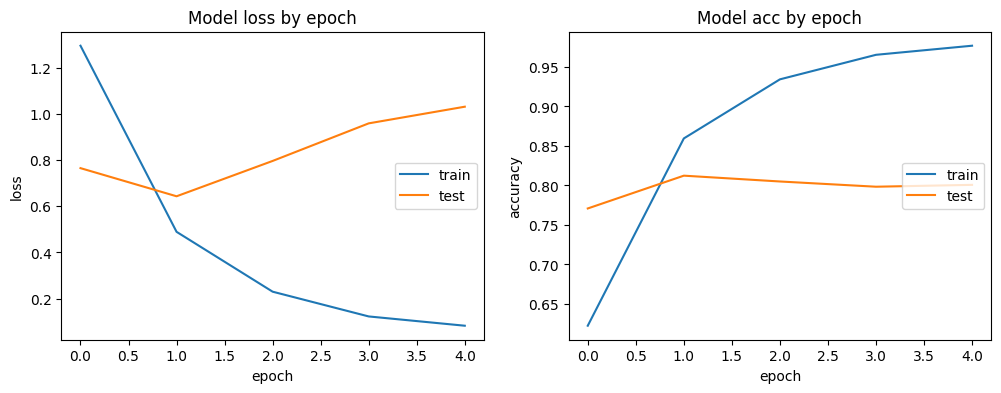

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(tloss)
plt.plot(tvalloss)
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')



plt.subplot(122)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model acc by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right');

### Rapport de classification

In [25]:

y_test_original=y_test
# On évalue le niveau de précision de notre prédiction.
print("Précision de la prédiction:", accuracy_score(y_test_original, test_pred_original)*100, '%')

print("Evaluation détaillée de la Classification par RDF :\n \n" ,
      (classification_report(y_test_original, test_pred_original)))

Précision de la prédiction: 80.01059821008008 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.45      0.46      0.46       643
          40       0.57      0.74      0.64       503
          50       0.79      0.77      0.78       319
          60       0.81      0.89      0.85       179
        1140       0.75      0.77      0.76       545
        1160       0.75      0.92      0.83       793
        1180       0.65      0.52      0.58       144
        1280       0.71      0.69      0.70      1002
        1281       0.58      0.56      0.57       408
        1300       0.93      0.95      0.94       993
        1301       0.93      0.94      0.93       162
        1302       0.79      0.80      0.79       514
        1320       0.88      0.70      0.78       664
        1560       0.83      0.82      0.83       993
        1920       0.89      0.93      0.91       832
        1940       0.86      0.7

In [26]:
print(X_text_train.info())
print( y_train.info())
print(X_text_test.info())
print( y_test.info())

<class 'pandas.core.series.Series'>
Index: 67932 entries, 73797 to 58067
Series name: tokenized
Non-Null Count  Dtype 
--------------  ----- 
67932 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB
None
<class 'pandas.core.series.Series'>
Index: 67932 entries, 73797 to 58067
Series name: prdtypecode
Non-Null Count  Dtype
--------------  -----
67932 non-null  int64
dtypes: int64(1)
memory usage: 1.0 MB
None
<class 'pandas.core.series.Series'>
Index: 16984 entries, 66047 to 51817
Series name: tokenized
Non-Null Count  Dtype 
--------------  ----- 
16984 non-null  object
dtypes: object(1)
memory usage: 265.4+ KB
None
<class 'pandas.core.series.Series'>
Index: 16984 entries, 66047 to 51817
Series name: prdtypecode
Non-Null Count  Dtype
--------------  -----
16984 non-null  int64
dtypes: int64(1)
memory usage: 265.4 KB
None


In [27]:
import pandas as pd
df_test = pd.DataFrame({'tokenized': X_text_test, 'prdtypecode': y_test})
df_test['predict']=test_pred_original
df_test.head()

,tokenized,prdtypecode,predict
66047,"[stabilo, lot, stylos, feutre, film, ohpen, universal, indelebile, rouge, stabilo, stylo, feutre...",2522,2522
29942,"[housse, fauteuil, integrale, elastique, protectrice, vert, marque, homescapes, matiere, coton, ...",1920,1920
58440,"[miroir, sprint, n°, campionnissimo, valet]",2280,2280
55079,"[brisons, glace, cold, hearted, icecrown]",1160,2705
11424,"[little, prince, resine, prince, accueil, table, figurine, ornement, magideal, description, vede...",2060,2060


### Tableau des 5 classes les plus prédites pour chaque classe réélle

In [28]:
for c in Lcat:
    print(c,'   ------   ', catdict[c] )
    print(df_test[df_test['prdtypecode']==c]['predict'].value_counts(normalize=True)[:5])

10    ------    livres
predict
10      0.460342
2403    0.133748
2280    0.090202
1160    0.073095
2705    0.068429
Name: proportion, dtype: float64
40    ------    jeux video pour pc et consoles
predict
40      0.739563
10      0.053678
1160    0.045726
2403    0.027833
2462    0.019881
Name: proportion, dtype: float64
50    ------     accesoires jeux video
predict
50      0.771160
40      0.097179
2462    0.028213
1140    0.025078
1280    0.018809
Name: proportion, dtype: float64
60    ------    consoles de jeux video
predict
60      0.893855
40      0.033520
50      0.027933
2462    0.027933
2905    0.005587
Name: proportion, dtype: float64
1140    ------    produits derives “geeks” et figurines
predict
1140    0.768807
1280    0.047706
40      0.036697
1160    0.034862
10      0.016514
Name: proportion, dtype: float64
1160    ------    cartes collectionables
predict
1160    0.923077
10      0.020177
40      0.011349
2403    0.007566
1300    0.007566
Name: proportion, dtype: float64

In [29]:
top5_df = pd.DataFrame({'prdtypecode':y_test_original ,'predict': test_pred_original})

df_cross=pd.crosstab(top5_df['prdtypecode'], top5_df['predict'],normalize='index')
top5_df.head()

,prdtypecode,predict
66047,2522,2522
29942,1920,1920
58440,2280,2280
55079,1160,2705
11424,2060,2060


In [30]:
df_pred = pd.DataFrame()
for c in Lcat:
            s = df_cross.loc[c].sort_values(ascending=False)[:5]
            df_temp = pd.DataFrame([{'Categorie':c,'predict':s.index[0],'pourc':s.values[0],'predict2':s.index[1],'pourc2':s.values[1],'predict3':s.index[2],'pourc3':s.values[2]}])
            df_pred = pd.concat([df_pred, df_temp], ignore_index=True)

### Tableau des repartitions des **classes prédites** pour chaque **classe réelle**

In [31]:
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.460342,2403,0.133748,2280,0.090202
1,40,40,0.739563,10,0.053678,1160,0.045726
2,50,50,0.771160,40,0.097179,2462,0.028213
3,60,60,0.893855,40,0.033520,50,0.027933
4,1140,1140,0.768807,1280,0.047706,40,0.036697
5,1160,1160,0.923077,10,0.020177,40,0.011349
6,1180,1180,0.520833,1160,0.076389,1281,0.069444
7,1280,1280,0.692615,1281,0.084830,1140,0.054890
8,1281,1281,0.556373,1280,0.176471,40,0.049020
9,1300,1300,0.945619,1280,0.025176,1140,0.005035


### Tableau croisé

In [32]:
df_cross

predict,10,40,50,60,1140,1160,1180,1280,1281,1300,1301,1302,1320,1560,1920,1940,2060,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
prdtypecode,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,0.460342,0.062208,0.004666,0.000000,0.020218,0.073095,0.003110,0.012442,0.015552,0.012442,0.000000,0.000000,0.003110,0.001555,0.003110,0.004666,0.007776,0.000000,0.090202,0.133748,0.003110,0.006221,0.003110,0.007776,0.003110,0.068429,0.000000
40,0.053678,0.739563,0.015905,0.003976,0.015905,0.045726,0.011928,0.013917,0.011928,0.001988,0.000000,0.003976,0.000000,0.001988,0.000000,0.001988,0.000000,0.001988,0.009940,0.027833,0.019881,0.000000,0.000000,0.001988,0.001988,0.011928,0.001988
50,0.003135,0.097179,0.771160,0.009404,0.025078,0.003135,0.000000,0.018809,0.000000,0.009404,0.000000,0.000000,0.000000,0.003135,0.000000,0.000000,0.003135,0.000000,0.000000,0.000000,0.028213,0.009404,0.000000,0.000000,0.015674,0.003135,0.000000
60,0.000000,0.033520,0.027933,0.893855,0.000000,0.000000,0.000000,0.005587,0.005587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027933,0.000000,0.000000,0.000000,0.000000,0.000000,0.005587
1140,0.016514,0.036697,0.001835,0.001835,0.768807,0.034862,0.012844,0.047706,0.011009,0.007339,0.000000,0.005505,0.000000,0.000000,0.000000,0.001835,0.009174,0.000000,0.012844,0.014679,0.005505,0.005505,0.000000,0.001835,0.003670,0.000000,0.000000
1160,0.020177,0.011349,0.001261,0.000000,0.003783,0.923077,0.003783,0.002522,0.006305,0.007566,0.000000,0.000000,0.000000,0.000000,0.000000,0.001261,0.000000,0.000000,0.003783,0.007566,0.001261,0.001261,0.000000,0.001261,0.000000,0.003783,0.000000
1180,0.048611,0.062500,0.020833,0.000000,0.069444,0.076389,0.520833,0.013889,0.069444,0.013889,0.000000,0.013889,0.006944,0.000000,0.013889,0.000000,0.006944,0.000000,0.006944,0.020833,0.000000,0.013889,0.000000,0.013889,0.000000,0.006944,0.000000
1280,0.005988,0.028942,0.004990,0.000000,0.054890,0.010978,0.004990,0.692615,0.084830,0.023952,0.000998,0.024950,0.014970,0.002994,0.002994,0.000000,0.009980,0.001996,0.001996,0.007984,0.000998,0.010978,0.000998,0.002994,0.001996,0.000998,0.000000
1281,0.034314,0.049020,0.004902,0.000000,0.012255,0.044118,0.012255,0.176471,0.556373,0.002451,0.007353,0.039216,0.004902,0.000000,0.000000,0.002451,0.000000,0.000000,0.000000,0.009804,0.014706,0.014706,0.002451,0.000000,0.000000,0.012255,0.000000


### Tableau des 5 classes les plus prédites pour chaque classe réélle avec libellés

In [33]:
for c in Lcat:
    print(c,'   ------   ', catdict[c] )
    s=df_cross.loc[c].sort_values(ascending=False)[:5]
    for index, value in s.items():
        print(f"  : {index},  : {np.round(value*100,2)} % , {catdict[index]}")

10    ------    livres
  : 10,  : 46.03 % , livres
  : 2403,  : 13.37 % , livres et bds
  : 2280,  : 9.02 % , magazines
  : 1160,  : 7.31 % , cartes collectionables
  : 2705,  : 6.84 % , bds et livres
40    ------    jeux video pour pc et consoles
  : 40,  : 73.96 % , jeux video pour pc et consoles
  : 10,  : 5.37 % , livres
  : 1160,  : 4.57 % , cartes collectionables
  : 2403,  : 2.78 % , livres et bds
  : 2462,  : 1.99 % , consoles de jeux video et jeux videos
50    ------     accesoires jeux video
  : 50,  : 77.12 % ,  accesoires jeux video
  : 40,  : 9.72 % , jeux video pour pc et consoles
  : 2462,  : 2.82 % , consoles de jeux video et jeux videos
  : 1140,  : 2.51 % , produits derives “geeks” et figurines
  : 1280,  : 1.88 % , jouets, peluches, poupees
60    ------    consoles de jeux video
  : 60,  : 89.39 % , consoles de jeux video
  : 40,  : 3.35 % , jeux video pour pc et consoles
  : 50,  : 2.79 % ,  accesoires jeux video
  : 2462,  : 2.79 % , consoles de jeux video et jeux 

### Matrice de confusion

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_original, test_pred_original)
print(cm[:10,:10])
print('*************************************************')
print(cm[10:20,10:20])
print('*************************************************')
print(cm[20:,20:])

[[296  40   3   0  13  47   2   8  10   8]
 [ 27 372   8   2   8  23   6   7   6   1]
 [  1  31 246   3   8   1   0   6   0   3]
 [  0   6   5 160   0   0   0   1   1   0]
 [  9  20   1   1 419  19   7  26   6   4]
 [ 16   9   1   0   3 732   3   2   5   6]
 [  7   9   3   0  10  11  75   2  10   2]
 [  6  29   5   0  55  11   5 694  85  24]
 [ 14  20   2   0   5  18   5  72 227   1]
 [  2   1   1   0   5   5   0  25   1 939]]
*************************************************
[[152   1   1   0   0   0   0   0   0   0]
 [  2 411   3   1   1   0   4   4   0   1]
 [  1  11 466  20  16   2  23   0   0   5]
 [  0   5   3 816  30   0  48   0   0   2]
 [  0   0   5  15 772   0  28   0   0   0]
 [  0   1   2   2   0 111   2   4   2   3]
 [  0   9   7  40  26   1 780   2   3   2]
 [  3   6   7   5   2   3   4 133   0   0]
 [  0   0   0   1   0   1   0   0 782  54]
 [  0   0   0   0   0   2   0   0  81 705]]
*************************************************
[[ 183    0    0    0    0    0    0]


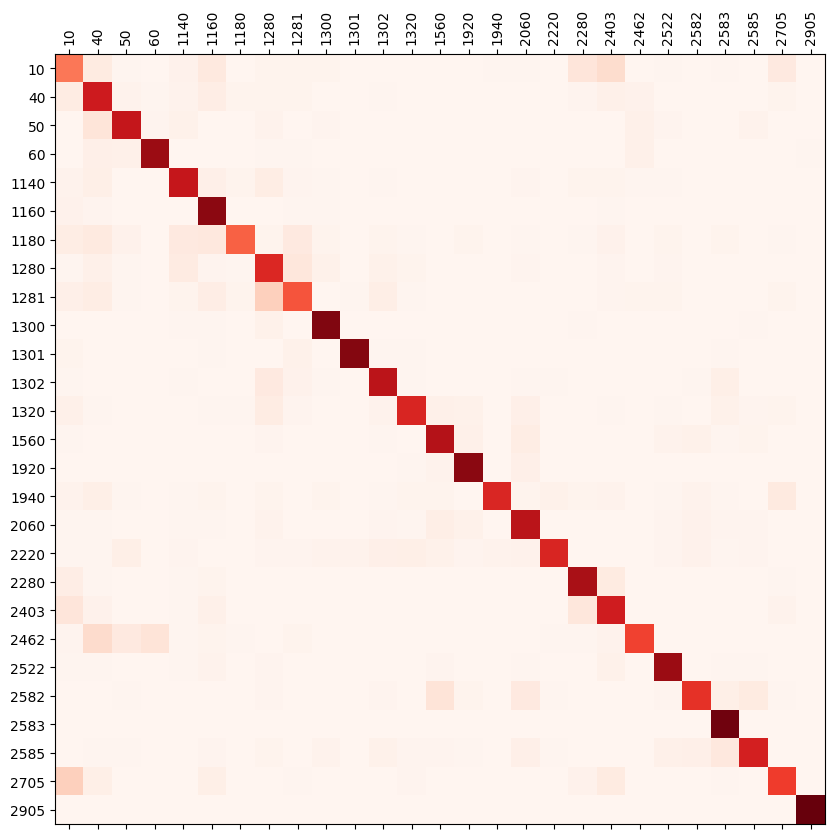

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
cm_normalized = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis])
#cm_normalized=cm.div(cm.sum(axis=1), axis=0)
cax = ax.matshow(cm_normalized, cmap='Reds')
plt.xticks(range(27),catdict,rotation=90)
plt.yticks(range(27),catdict,rotation=0)
plt.show()

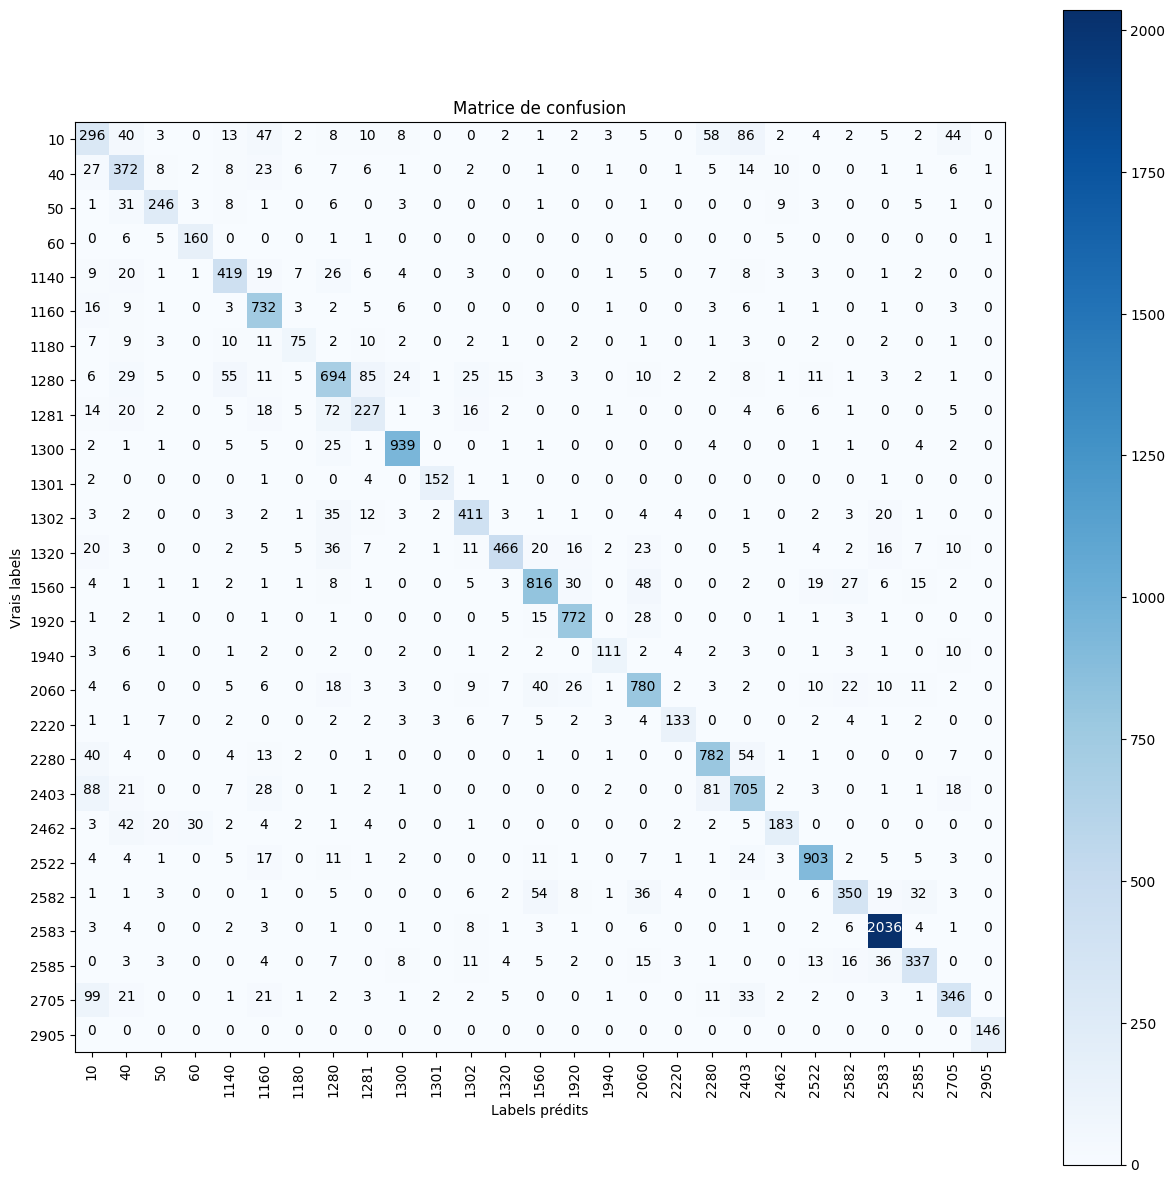

In [46]:

import itertools



# Calcul de la matrice de confusion
cnf_matrix = confusion_matrix(y_test_original, test_pred_original, labels=sorted(list(set(y_test_original))))

# Définition des classes
classes = sorted(list(set(y_test_original)))

# Création et configuration de la figure
plt.figure(figsize=(15, 15))
plt.imshow(cnf_matrix, interpolation='nearest', cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()

# Configuration des ticks
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

# Annotation de chaque cellule de la matrice de confusion
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > (cnf_matrix.max() / 2) else "black")

# Labels pour les axes
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')

# Affichage de la matrice de confusion
plt.show()


## Etude des catégories 10 ; 2280 ; 2403 ; 2705

In [47]:
df_livres=df_test[df_test['prdtypecode'].isin([10,2280,2403,2705])]
df_livres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3072 entries, 58440 to 46826
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tokenized    3072 non-null   object
 1   prdtypecode  3072 non-null   int64 
 2   predict      3072 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 96.0+ KB


### Tableau des 5 classes les plus prédites pour chaque classe réélle

In [48]:

for c in [10,2280,2403,2705]:
    print(c,'   ------   ', catdict[c] )
    print(df_livres[df_livres['prdtypecode']==c]['predict'].value_counts(normalize=True)[:5])

10    ------    livres
predict
10      0.460342
2403    0.133748
2280    0.090202
1160    0.073095
2705    0.068429
Name: proportion, dtype: float64
2280    ------    magazines
predict
2280    0.858397
2403    0.059276
10      0.043908
1160    0.014270
2705    0.007684
Name: proportion, dtype: float64
2403    ------    livres et bds
predict
2403    0.733611
10      0.091571
2280    0.084287
1160    0.029136
40      0.021852
Name: proportion, dtype: float64
2705    ------    bds et livres
predict
2705    0.621185
10      0.177738
2403    0.059246
40      0.037702
1160    0.037702
Name: proportion, dtype: float64


In [49]:
print(df_livres.info())
df_livres.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3072 entries, 58440 to 46826
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tokenized    3072 non-null   object
 1   prdtypecode  3072 non-null   int64 
 2   predict      3072 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 96.0+ KB
None


,tokenized,prdtypecode,predict
58440,"[miroir, sprint, n°, campionnissimo, valet]",2280,2280
1068,"[dictionnaire, etymologique, roman, derom, second, volume, dictionnaire, tymologique, roman, rom...",2705,2403
48464,"[compte, rebours, douze, mois]",2403,2705
22835,"[lot, sas]",2403,2403
37938,"[lot, premiers, tomes, etoiles, hommes, enseignement, christ, maitreya, richard, vitrac, marie, ...",2403,2403


### Répartition des 20 mots les plus présents sur l'ensemble de ces catégories

In [50]:
import pandas as pd
from collections import Counter

# Étape 1 : Identifier les 20 mots les plus fréquents
all_words = sum(df_livres['tokenized'].tolist(), [])
global_word_counts = Counter(all_words)
top_20_words = global_word_counts.most_common(20)

# Étape 2 : Calculer le nombre d'occurrences de chaque mot pour chaque classe et globalement
# Initialiser les données pour le DataFrame
data = {"Word": [word for word, count in top_20_words], "Total": [count for word, count in top_20_words]}
class_ids = df_livres['prdtypecode'].unique()

# Calculer les occurrences par classe pour chaque mot
for class_id in class_ids:
    data[class_id] = []
    for word, _ in top_20_words:
        word_count = sum(row.count(word) for row in df_livres[df_livres['prdtypecode'] == class_id]['tokenized'])
        data[class_id].append(word_count)

# Étape 3 : Créer le DataFrame
df_word_counts = pd.DataFrame(data)
df_word_counts.set_index("Word", inplace=True)

# Afficher le DataFrame
print(df_word_counts)
df_total_livres=df_word_counts


            Total  2280  2705  2403  10
Word                                   
n°            962   763     4   151  44
lot           426     0     0   426   0
vie           231    33   151    29  18
livres        221     5    13   189  14
monde         179    54   106    14   5
tome          170     6    58    66  40
france        160    73    35    33  19
livre         157     3    83    34  37
cette         149     3   142     2   2
histoire      141    24    70    28  19
temps         108     9    74    14  11
paris         102    55    26    15   6
collection    100    10    16    58  16
jean           97    39    21    25  12
journal        96    66     7    16   7
homme          96     6    77     6   7
edition        96     4     9    40  43
bien           95     7    85     2   1
deux           92    19    54    14   5
entre          92     6    73     7   6


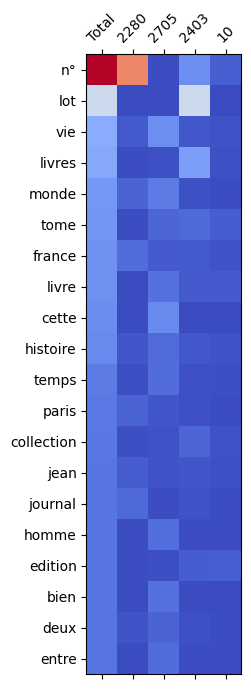

In [51]:
fig, ax = plt.subplots(figsize=(2,20))
cax = ax.matshow(df_total_livres.iloc[0:20], cmap = 'coolwarm')
plt.xticks(range(5),(df_total_livres.columns.tolist()),rotation=45)
plt.yticks(range(20),df_total_livres.iloc[0:20].index,rotation=0)
plt.show()


## Etude des catégories 1280,1281

In [52]:
df_jouets=df_test[df_test['prdtypecode'].isin([1280,1281])]

### Tableau des 5 classes les plus prédites pour chaque classe réélle

In [53]:
for c in [1280,1281]:
    print(c,'   ------   ', catdict[c] )
    print(df_jouets[df_jouets['prdtypecode']==c]['predict'].value_counts(normalize=True)[:5])

1280    ------    jouets, peluches, poupees
predict
1280    0.692615
1281    0.084830
1140    0.054890
40      0.028942
1302    0.024950
Name: proportion, dtype: float64
1281    ------    jeux de societe/cartes
predict
1281    0.556373
1280    0.176471
40      0.049020
1160    0.044118
1302    0.039216
Name: proportion, dtype: float64


### Répartition des 20 mots les plus présents sur l'ensemble de ces catégories

In [54]:
import pandas as pd
from collections import Counter

# Étape 1 : Identifier les 20 mots les plus fréquents
all_words = sum(df_jouets['tokenized'].tolist(), [])
global_word_counts = Counter(all_words)
top_20_words = global_word_counts.most_common(20)

# Étape 2 : Calculer le nombre d'occurrences de chaque mot pour chaque classe et globalement
# Initialiser les données pour le DataFrame
data = {"Word": [word for word, count in top_20_words], "Total": [count for word, count in top_20_words]}
class_ids = df_jouets['prdtypecode'].unique()

# Calculer les occurrences par classe pour chaque mot
for class_id in class_ids:
    data[class_id] = []
    for word, _ in top_20_words:
        word_count = sum(row.count(word) for row in df_jouets[df_jouets['prdtypecode'] == class_id]['tokenized'])
        data[class_id].append(word_count)

# Étape 3 : Créer le DataFrame
df_word_counts = pd.DataFrame(data)
df_word_counts.set_index("Word", inplace=True)

# Afficher le DataFrame
df_word_counts
df_total_livres=df_word_counts
df_word_counts

,Total,1280,1281
Word,,,
enfants,1350,940,410
jouet,594,445,149
jouets,593,435,158
bebe,546,416,130
taille,529,423,106
haute,432,337,95
jeu,415,184,231
couleur,372,289,83
toy,372,290,82


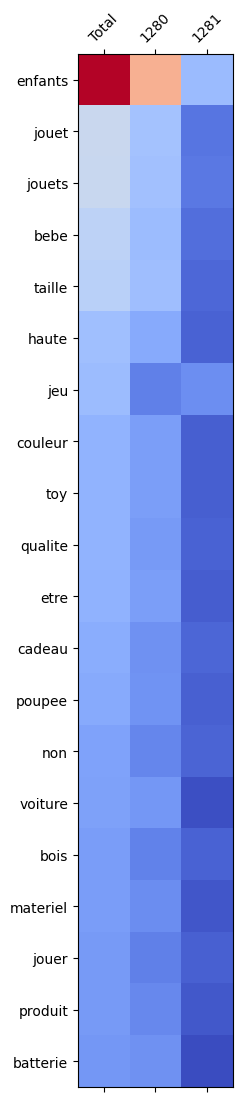

In [55]:
fig, ax = plt.subplots(figsize=(2,20))
cax = ax.matshow(df_total_livres.iloc[0:20], cmap = 'coolwarm')
plt.xticks(range(3),(df_total_livres.columns.tolist()),rotation=45)
plt.yticks(range(20),df_total_livres.iloc[0:20].index,rotation=0)
plt.show()

### Sauvegarde des données

In [56]:
ds.save_ndarray(label_encoder,'RNN_EMBEDDING_label_encoder')

# Cette partie est utilisée dans streamlit pour prédire la catégorie d'une image
## prédiction d'une image du jeu de test

In [ ]:
def get_DF_TEST_DESCRIPTION(nom_image):


        print(nom_image)
        nom_image_sans_jpg = nom_image.split('.')[0]
        print(nom_image_sans_jpg)
        # Diviser la chaîne en utilisant le caractère de soulignement ('_') comme séparateur
        parties = nom_image_sans_jpg.split('_')

        numero_image = int(parties[1])
        numero_produit = int(parties[3])

        print(numero_image,numero_produit)

        subset = df_cible[(df_cible.imageid == numero_image) & (df_cible.productid == numero_produit)]['Unnamed: 0' ].iloc[0]
        indice = subset
        print(indice)

        return indice

In [ ]:
nom_image = "image_1034536830_product_676837561.jpg"
# lecture des données sources d'entrainement
df_cible=pd.read_csv(ds.get_RACINE_DOSSIER() + 'X_test_update.csv')
df_cible.head()

,Unnamed: 0,designation,description,productid,imageid
0,84916,Folkmanis Puppets - 2732 - Marionnette Et Théâtre - Mini Turtle,NaN,516376098,1019294171
1,84917,Porte Flamme Gaxix - Flamebringer Gaxix - 136/220 - U - Twilight Of The Dragons,NaN,133389013,1274228667
2,84918,Pompe de filtration Speck Badu 95,NaN,4128438366,1295960357
3,84919,Robot de piscine électrique,<p>Ce robot de piscine d&#39;un design innovant et élégant apportera un nettoyage efficace et ra...,3929899732,1265224052
4,84920,Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X 25 Mm,NaN,152993898,940543690


In [ ]:
indice = get_DF_TEST_DESCRIPTION(nom_image)
print("indice = ",indice)

image_1034536830_product_676837561.jpg
image_1034536830_product_676837561
1034536830 676837561
87846
indice =  87846


In [ ]:
df_cible=df_cible.loc[df_cible['Unnamed: 0']==84919]
print(df_cible)
df_cible['phrases'] = df_cible.swifter.apply(combine_description_and_designation, axis=1)

   Unnamed: 0                  designation  \
3       84919  Robot de piscine électrique   

                                                                                           description  \
3  <p>Ce robot de piscine d&#39;un design innovant et élégant apportera un nettoyage efficace et ra...   

    productid     imageid  \
3  3929899732  1265224052   

                                                                                               phrases  
3  Robot de piscine électrique <p>Ce robot de piscine d&#39;un design innovant et élégant apportera...  


Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_cible['WordRNN'] = df_cible['phrases'].swifter.apply(lambda x :preprocess_sentence(x))
df_cible.head()

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

,Unnamed: 0,designation,description,productid,imageid,phrases,WordRNN
3,84919,Robot de piscine électrique,<p>Ce robot de piscine d&#39;un design innovant et élégant apportera un nettoyage efficace et ra...,3929899732,1265224052,Robot de piscine électrique <p>Ce robot de piscine d&#39;un design innovant et élégant apportera...,robot piscine electrique robot piscine design innovant elegant apportera nettoyage efficace rapi...


In [ ]:
df_cible['tokenized'] = df_cible['WordRNN'].swifter.apply(preprocess_text)
df_cible['tokenized']

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

3    [robot, piscine, electrique, robot, piscine, design, innovant, elegant, apportera, nettoyage, ef...
Name: tokenized, dtype: object

In [ ]:
X_cible_1 = tokenizer.texts_to_sequences(df_cible['tokenized'])

X_cible = tf.keras.preprocessing.sequence.pad_sequences(X_cible_1, maxlen=MAXLEN, padding='post', truncating='post')

X_cible

In [ ]:
pred_cible = model.predict( X_cible)

1/1 [==============================] - 0s 77ms/step


In [ ]:
pred_cible

array([[1.6361259e-06, 1.3425267e-06, 4.7947026e-07, 2.3506180e-07,
        1.2196905e-07, 2.2395586e-06, 7.1036089e-07, 4.3756842e-07,
        2.2203858e-07, 2.8211829e-07, 6.8296457e-10, 5.7325215e-06,
        1.5060851e-07, 2.2376490e-07, 1.1795046e-07, 6.0674455e-07,
        1.0053934e-07, 5.3215569e-08, 7.7342918e-07, 4.5951643e-07,
        5.0006400e-07, 5.0032497e-07, 8.2773164e-07, 9.9995792e-01,
        2.1374799e-05, 2.8488048e-06, 4.9123791e-08]], dtype=float32)

In [ ]:
y_cible_indice = np.argmax(pred_cible, axis=1)
y_cible_indice

array([23])

In [ ]:
catdict[y_cible[0]]

'accesoires de piscine'

In [ ]:
y_cible=label_encoder.inverse_transform(y_cible_indice)
y_cible

array([2583])

In [ ]:
load_label_encoder=ds.load_ndarray('RNN_EMBEDDING_label_encoder')

In [ ]:
y_cible_2=load_label_encoder.inverse_transform(y_cible_indice)
y_cible_2

array([2583])